# Analyzing the Top 50 Solar Flares

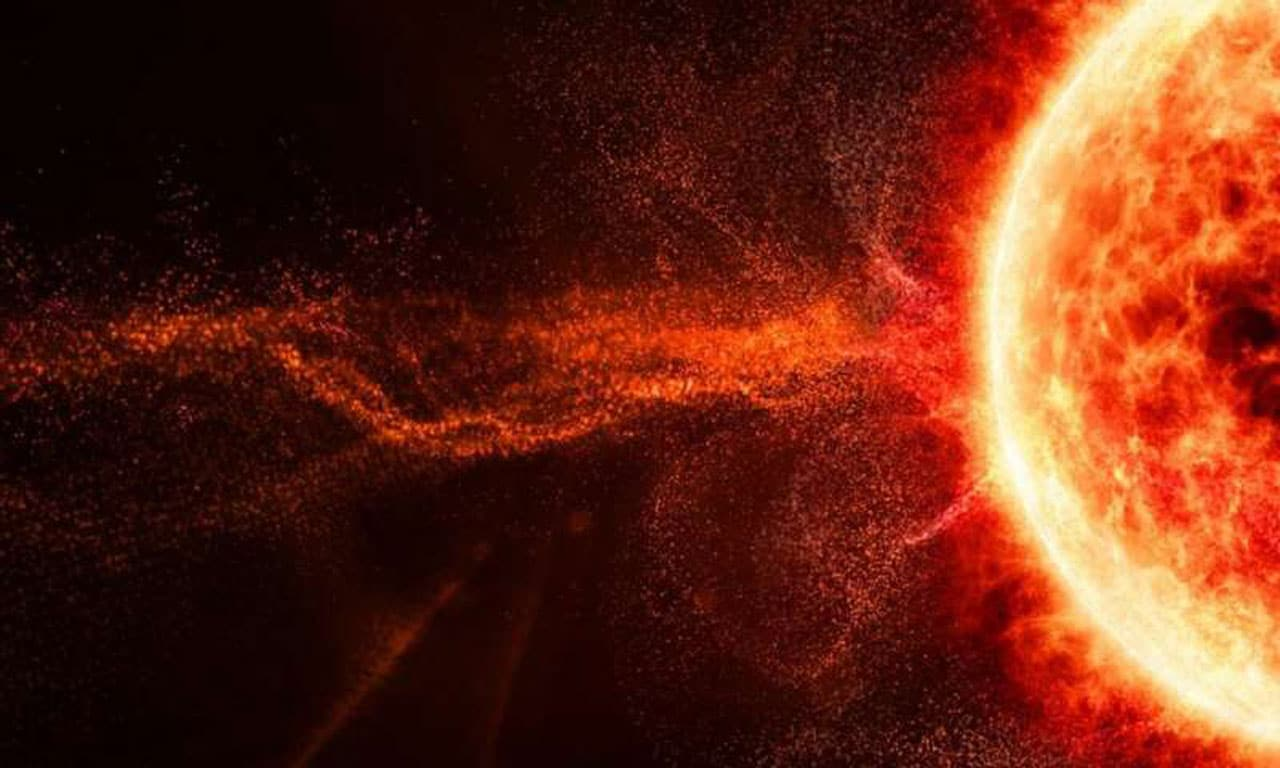

### Name: Akintunde Rockson

## Overview

In this project, I am trying to provide better data about the top 50 solar flares than the data provided by SpaceWeatherLive.com. To do this, I will use information from NASA's website to get the extra data I need to improve  on SpaceWeatherLive's Top 50.

I don't have access to the raw data for either of these two tables, so I will scrape this information directly from each HTML page

## Data scraping and preparation

In [1]:
#Imports
import numpy as np
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import pandas as pd

In [2]:
#Getting html data
r = requests.get('https://cmsc320.github.io/files/top-50-solar-flares.html')

In [3]:
#Extracting the text, reading and parsing the data
root = BeautifulSoup(r.content, "html.parser")

In [4]:
#Using prettify to find the appropriate data - Too long so I commented it out
#print(root.prettify())

In [5]:
#Isolating the data in a table
solartable = root.find("table")

In [6]:
#Creating an empty datafram with the appropriate column names
table = pd.DataFrame(columns=['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 
                                  'end_time', 'movie'], index = range(0,50))

In [7]:
#Filling out the dataframe with the table data
row_marker = 0
for row in solartable.find_all('tr'): #Iterating through rows
    column_marker = 0
    columns = row.find_all('td')
    row_marker += 1
    for column in columns: #Iterating through each cell in the rows
        if row_marker > 1: #First row has unwanted info so skip that
            table.iloc[row_marker-2,column_marker] = column.get_text()
            column_marker += 1

In [8]:
table

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,0486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,0808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,0486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,0930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,0486,17:03,17:25,17:39,MovieView archive


## Tidying the top 50 solar flare data 

In [9]:
#Drop last column
table = table.drop('movie', axis=1)

#Combining the date and each of the three time columns into three datetime columns
table['start_datetime'] = pd.to_datetime(table['date'] + ' ' + table['start_time'])
table['max_datetime'] = pd.to_datetime(table['date'] + ' ' + table['max_time'])
table['end_datetime'] = pd.to_datetime(table['date'] + ' ' + table['end_time'])

#New table with only the specified columns in the right order
table = table[['rank', 'x_class', 'start_datetime', 'max_datetime', 'end_datetime', 'region']] 

table.replace('-','NaN') #No regions missing
table

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486


## Scraping the NASA data 

In [10]:
r = requests.get('http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')
root = BeautifulSoup(r.content, "html.parser")

In [11]:
nasa_table = root.find('pre') 
nasa_table

<pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04/01 14:15  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c2rdif_waves.html">8000</a>  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c3rdif_waves.html">4000</a>   S25E16  8026 M1.3   <a href="https://cdaw.gsfc.nasa.gov/CME_list/UNIVERSAL/1997_04/jsmovies/1997_04/19970401.151838.p073g/c2_rdif.html">04/01</a> 15:18   74   79  

In [12]:
#Putting each line of the html into an arrat
text = nasa_table.get_text()
lines = text.split('\n')
lines = lines[12:-2]

#creating empty dataframe
new_nasa = pd.DataFrame(columns=['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency',
                                'flare_location', 'flare_region', 'flare_classification', 'cme_date', 'cme_time', 
                                 'cme_angle', 'cme_width', 'cme_speed'], index = range(0,len(lines)))


#Filling dataframe with html values. Splitting each line on whitespace
row_marker = 0
for line in lines:
    columns = line.split()
    column_marker = 0
    for cell in columns[:14]:
        new_nasa.iloc[row_marker][column_marker] = cell
        column_marker+=1 
    row_marker+=1
new_nasa

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252


## Tidying the NASA data

In [13]:
def onlyInt(x): # Helper
    bad_chars = [';', '>','h']
    x = str(x)
    for i in bad_chars:
        x = x.replace(i, '')
    return x

#Replacing unavailable data with NaN
new_nasa = new_nasa.replace('---','NaN').replace('----', 'NaN').replace('-----', 'NaN').replace('------','NaN')
new_nasa = new_nasa.replace('--/--','NaN').replace('--:--','NaN')
new_nasa = new_nasa.replace('????', 'NaN')

#New is_halo column that returns if cme_angle is a halo. Replace all hale ine cme_angle with NaN
new_nasa["is_halo"] = new_nasa['cme_angle'].map(lambda x: x == 'Halo')
new_nasa = new_nasa.replace('Halo', 'NA')

#New width_lower_bound that indicates if the cme_width is given as a lower bound
new_nasa["width_lower_bound"] = new_nasa['cme_width'].map(lambda x: str(x)[0] == '>')

#Removing non_numeric parts of cme_width   
new_nasa["cme_width"] = new_nasa["cme_width"].map(lambda x: onlyInt(x))
new_nasa


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,360,878,True,False
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,360,464,True,False
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,NA,360,1418,True,False
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,NA,360,1571,True,False
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,NaN,X8.3,09/10,16:00,NA,360,3163,True,False
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,False,False


In [14]:
#Combining date and time columns for start, end and cme
for row in range(0,len(lines)):
    temp = new_nasa.values[row][0].split('/')[0] # Getting each year
    new_nasa.iloc[row, 2] = temp + '/' + new_nasa.values[row][2] # Replacing end_date
    new_nasa.iloc[row, 9] = temp + '/' + new_nasa.values[row][9] # Replacing cme_date
    
new_nasa=new_nasa.replace('24:00','00:00') #Replace 24:00 with 00:00
new_nasa['start_datetime'] = pd.to_datetime(new_nasa['start_date'] + ' ' + new_nasa['start_time'])
new_nasa['end_datetime'] = pd.to_datetime(new_nasa['end_date'] + ' ' + new_nasa['end_time'])
new_nasa['cme_datetime'] = pd.to_datetime(new_nasa['cme_date'] + ' ' + new_nasa['cme_time'], errors='coerce')



new_nasa

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,start_datetime,end_datetime,cme_datetime
0,1997/04/01,14:00,1997/04/01,14:15,8000,4000,S25E16,8026,M1.3,1997/04/01,15:18,74,79,312,False,False,1997-04-01 14:00:00,1997-04-01 14:15:00,1997-04-01 15:18:00
1,1997/04/07,14:30,1997/04/07,17:30,11000,1000,S28E19,8027,C6.8,1997/04/07,14:27,NA,360,878,True,False,1997-04-07 14:30:00,1997-04-07 17:30:00,1997-04-07 14:27:00
2,1997/05/12,05:15,1997/05/14,16:00,12000,80,N21W08,8038,C1.3,1997/05/12,05:30,NA,360,464,True,False,1997-05-12 05:15:00,1997-05-14 16:00:00,1997-05-12 05:30:00
3,1997/05/21,20:20,1997/05/21,22:00,5000,500,N05W12,8040,M1.3,1997/05/21,21:00,263,165,296,False,False,1997-05-21 20:20:00,1997-05-21 22:00:00,1997-05-21 21:00:00
4,1997/09/23,21:53,1997/09/23,22:16,6000,2000,S29E25,8088,C1.4,1997/09/23,22:02,133,155,712,False,False,1997-09-23 21:53:00,1997-09-23 22:16:00,1997-09-23 22:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,2017/09/05,04:54,14000,210,S10W12,12673,M5.5,2017/09/04,20:12,NA,360,1418,True,False,2017-09-04 20:27:00,2017-09-05 04:54:00,2017-09-04 20:12:00
514,2017/09/06,12:05,2017/09/07,08:00,16000,70,S08W33,12673,X9.3,2017/09/06,12:24,NA,360,1571,True,False,2017-09-06 12:05:00,2017-09-07 08:00:00,2017-09-06 12:24:00
515,2017/09/10,16:02,2017/09/11,06:50,16000,150,S09W92,NaN,X8.3,2017/09/10,16:00,NA,360,3163,True,False,2017-09-10 16:02:00,2017-09-11 06:50:00,2017-09-10 16:00:00
516,2017/09/12,07:38,2017/09/12,07:43,16000,13000,N08E48,12680,C3.0,2017/09/12,08:03,124,96,252,False,False,2017-09-12 07:38:00,2017-09-12 07:43:00,2017-09-12 08:03:00


In [15]:
new_nasa = new_nasa[['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 
                     'flare_location', 'flare_region','flare_classification', 
                     'cme_datetime', 'cme_angle', 'cme_width', 'cme_speed', 'is_halo', 
                     'width_lower_bound' ]]
new_nasa = new_nasa.replace('NaT','NaN')
new_nasa


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NA,360,1418,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,False,False


# Analysis

## Replication

In [16]:
import warnings
warnings.filterwarnings('ignore')
#Obtaining the top 50 flares
#Getting X class rows
top_50 = new_nasa[new_nasa['flare_classification'].str.contains('X')]

#Creating column for sorting the X class flares
top_50['flare'] = top_50.flare_classification.str.strip('X').astype(float)
top_50 = top_50.sort_values(by=['flare'], ascending=False)

#Top 50
top_50 = top_50.head(50)

#Resetting the index
top_50.index = range(1,len(top_50)+1)

#Removed extra column used for sorting
top_50.drop('flare',1, inplace=True)
top_50


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
1,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NA,360,2657,True,False
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False
3,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NA,360,2459,True,False
4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False
5,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NA,360,2029,True,False
6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False
7,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False
8,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,False
9,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,True,False
10,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False


A lot of the observations from the SpaceWeatherLive data seem to be present in the NASA table based on the flare classification but the information inside the similar observations seems to be slightly different. The regions are the same for the most part, the times rarely match and there are quite a new flare classifications in the SpaceWeatherLive dataset that aren't present in the NASA dataset.

## Integration 

In [17]:
def isFloat(s): #helper method for dealing with converting to float errors
    try: 
        return float(s)
    except ValueError:
        return s

newsolar = table #making a copy of the SpaceWeatherLive data table
newnasa = new_nasa #making a copy of the NASA data table
newnasa['SWL_rank'] = pd.Series('NaN', index=newnasa.index)

#getting flare classification column ready for comparison with nasa's flare classifications
newsolar['x_class'] = newsolar['x_class'].str.strip('X') 
newsolar['x_class'][:4] = newsolar['x_class'][:4].str.strip('+')
newsolar['x_class']=newsolar['x_class'].astype(float)

#####
#This function iterates through the whole solar table and checks if the region and flare
#classification match for any of single row observation in the NASA table. If they match, the 
#rank is returned and if they don't 'None' is returned
#####
rank_tracker = []
def rank_finder(row_count):
    for i,row in newsolar.iterrows():
        if (newnasa.iloc[row_count,5][-4:] == row['region']) and (isFloat(newnasa.iloc[row_count,6][1:]) == row['x_class']):
            rank_tracker.append(int(row['rank']))
            return row['rank']



#Applying the function to all the rows in the NASA table
for i, row in newnasa.iterrows():
    rank = rank_finder(i)
    
    newnasa.iloc[i, 13]= rank

#pd.set_option('display.max_rows', newnasa.shape[0]+1)

newnasa

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,SWL_rank
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False,None
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False,None
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False,None
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False,None
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NA,360,1418,True,False,None
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False,8
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,True,False,None
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,False,False,None


## Analysis 

These plots show how the starting frequencies, ending frequencies and cme widths for the top 50 flares compare to the rest of the NASA dataset. The top 50 flares are in red while the rest are in black

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Starting Frequencies')

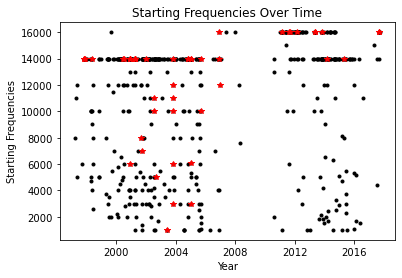

In [19]:
#By start_frequency
new_nasa['start_frequency'].replace('NaN', np.nan, inplace=True)
top_50['start_frequency'] = top_50['start_frequency'].astype(float) # to get an ordered y axis
new_nasa['start_frequency'] = new_nasa['start_frequency'].astype(float)

plt.plot(new_nasa['start_datetime'], new_nasa['start_frequency'], '.', color='black')
plt.plot(top_50['start_datetime'], top_50['start_frequency'], '*', color='red') #top 50
plt.title('Starting Frequencies Over Time')
plt.xlabel('Year')
plt.ylabel('Starting Frequencies')

The top 50 flares seem to fit in to the rest of the NASA dataset. Most of them seem to have high starting frequencies but so do a lot of other flares not in the top 50.

Text(0, 0.5, 'Ending Frequencies')

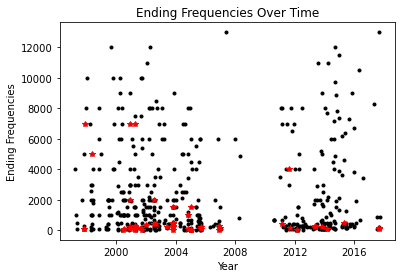

In [20]:
#Plotting Top 50 Flares

#By end_frequency
new_nasa['end_frequency'].replace('NaN', np.nan, inplace=True)
top_50['end_frequency'] = top_50['end_frequency'].astype(float) # to get an ordered y axis
new_nasa['end_frequency'] = new_nasa['end_frequency'].astype(float)

plt.plot(new_nasa['start_datetime'], new_nasa['end_frequency'], '.', color='black')
plt.plot(top_50['start_datetime'], top_50['end_frequency'], '*', color='red') #top 50
plt.title('Ending Frequencies Over Time')
plt.xlabel('Year')
plt.ylabel('Ending Frequencies')

There is little distinction between the top 50 flares and those not in the top 50. You would not be able to tell the difference if they were all the same color

Text(0, 0.5, 'Widths')

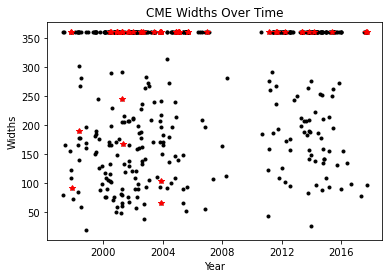

In [21]:
#Plotting Top 50 Flares

#By cme_width
new_nasa['cme_width'].replace('NaN', np.nan, inplace=True)
top_50['cme_width'] = top_50['cme_width'].astype(float) # to get an ordered y axis
new_nasa['cme_width'] = new_nasa['cme_width'].astype(float)

plt.plot(new_nasa['start_datetime'], new_nasa['cme_width'], '.', color='black')
plt.plot(top_50['start_datetime'], top_50['cme_width'], '*', color='red') #top 50
plt.title('CME Widths Over Time')
plt.xlabel('Year')
plt.ylabel('Widths')

The vast majority of the top 50 flares seem to have large widths, but so do a lot of other flares not in the top 50.

There seems to be a positive correlation between the cme widths and the starting frequencies as their plots over time look very similar.